# **Gesutre Recognition using EMG Pattern**

In [ ]:
# setup - mounting drive for accessing the EMG Pattern database

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing required libraries

In [ ]:
# listdir for listing files and sub-folders for a given path
from os import listdir

import numpy as np
import pandas as pd

# different classifiers for training models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# for plotting graphs and charts
import seaborn as sns
import matplotlib.pyplot as plt

## **Creating the Dataset**

In [ ]:
# path to the Data folder
data_folder_path = '/content/drive/MyDrive/Data.zip (Unzipped Files)/Data'

In odrder to create the dataset, all the raw text files are traversed and merged to form a single dataset

In [ ]:
# creating an empty data frame
dataset = pd.DataFrame()

# listing all the sub-directories of the Data folder
for folder in listdir(data_folder_path):

  # skipping the README.txt file
  if folder == 'README.txt':
    continue

  # path for each sub-folder
  sub_folder_path = data_folder_path + '/' + folder

  # listing the raw data files of each sub-folders
  for file in listdir(sub_folder_path):

    # path of each raw data file
    file_path = sub_folder_path + '/' + file

    ## creating the dataset with initial file when the data frame is empty
    ## else combining the new data records with the existing data frame
    if dataset.empty:

      # reading the .txt file with delimiter as blank spaces
      dataset = pd.read_csv(file_path, sep='\s')

    else:
      data = pd.read_csv(file_path, sep='\s')
      dataset = pd.concat([dataset, data]) # combining the data with the current dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [ ]:
# viewing the initail records of the dataset
dataset.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,-0.00002,-0.00005,-0.00004,0.00001,-0.00001,-0.00002,0.00001,0.0,0.0
1,5,-0.00002,-0.00005,-0.00004,0.00001,-0.00001,-0.00002,0.00001,0.0,0.0
2,6,-0.00002,-0.00005,-0.00004,0.00001,-0.00001,-0.00002,0.00001,0.0,0.0
3,7,-0.00002,-0.00005,-0.00004,0.00001,-0.00001,-0.00002,0.00001,0.0,0.0
4,8,-0.00002,-0.00005,-0.00004,0.00001,-0.00001,-0.00002,0.00001,0.0,0.0


## **Exploratory data analysis**

In [ ]:
# summarizing the number of rows, columns and their types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237908 entries, 0 to 51077
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   time      int64  
 1   channel1  float64
 2   channel2  float64
 3   channel3  float64
 4   channel4  float64
 5   channel5  float64
 6   channel6  float64
 7   channel7  float64
 8   channel8  float64
 9   class     float64
dtypes: float64(9), int64(1)
memory usage: 355.7 MB


It is observed that there are 4237908 records in total

In [ ]:
# summarizing the stats pertaining to the dataset
dataset.describe()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
count,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237907e+06
mean,3.113689e+04,-7.911481e-06,-9.416077e-06,-9.548735e-06,-9.637838e-06,-1.599724e-05,-1.085528e-05,-9.364637e-06,-9.696860e-06,1.265671e+00
std,1.868079e+04,1.631110e-04,1.192228e-04,1.241846e-04,2.257728e-04,2.724188e-04,2.151405e-04,1.527311e-04,1.720933e-04,1.989693e+00
min,0.000000e+00,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,0.000000e+00
25%,1.529000e+04,-3.000000e-05,-4.000000e-05,-4.000000e-05,-6.000000e-05,-8.000000e-05,-6.000000e-05,-4.000000e-05,-3.000000e-05,0.000000e+00
50%,3.054600e+04,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,0.000000e+00
75%,4.580400e+04,2.000000e-05,2.000000e-05,3.000000e-05,4.000000e-05,5.000000e-05,3.000000e-05,2.000000e-05,1.000000e-05,2.000000e+00
max,9.714400e+04,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,7.000000e+00


### **Checking and removing null values**

In [ ]:
# counting the number of null values in each column
dataset.isnull().sum()

time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       1
dtype: int64

The above results shows that there is only a single null value in the entire dataset, which is present in the column of 'class'

In [ ]:
# projecting the record that contains the null value 
dataset[pd.isnull(dataset['class'])]

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
79764,97144,-0.00002,-0.00003,-0.00003,-0.00002,-0.00002,0.0,0.0,-0.00001,NaN


In [ ]:
# removing the record that contain null value
dataset.dropna(inplace=True)

### **Removing insignificant data**
Since the class labelled '0' is unmarked, using the records containing the class value as '0' is insignificant as it does not provide any useful information. Hence the records containing the class label as '0' are dropped.

In [ ]:
# removing records whose class label is marked as '0'
dataset = dataset[dataset['class'] != 0]

The column named 'time' is also removed as it does not provide any significant information

In [ ]:
# removing the 'time' column
dataset = dataset.drop(labels='time', axis=1)

In [ ]:
# summary of the filtered dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512750 entries, 1483 to 50126
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   channel1  1512750 non-null  float64
 1   channel2  1512750 non-null  float64
 2   channel3  1512750 non-null  float64
 3   channel4  1512750 non-null  float64
 4   channel5  1512750 non-null  float64
 5   channel6  1512750 non-null  float64
 6   channel7  1512750 non-null  float64
 7   channel8  1512750 non-null  float64
 8   class     1512750 non-null  float64
dtypes: float64(9)
memory usage: 115.4 MB


### **Data visualization**

In [ ]:
# features that are relevant for training 
features = list(dataset.columns)
features.remove('class')

print(features)

['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8']


#### **Countplot**
Visualizing the proportion of different classes in the dataset 

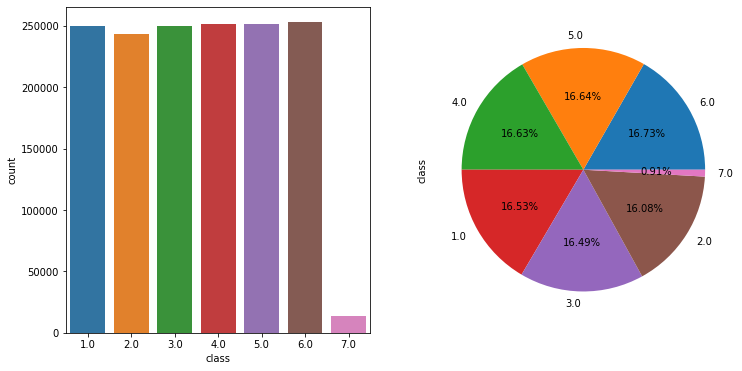

In [ ]:
# plotting the countplot 

fig, ax = plt.subplots(1,2,figsize=(12,6))

# bar graph for visualizing the count of various classes
bar = sns.countplot(x='class', data=dataset, ax=ax[0])

# pie chart depicting the proportion of data for different classes
pie = dataset['class'].value_counts().plot.pie(autopct="%.2f%%", ax=ax[1])

As it is observed, all the classes except the class labelled '7' are more or less equal in proportion. The class labelled '7' constitues only 0.91% of the data

#### **Density Plots**
Visualizing the distribution of each feature of the dataset

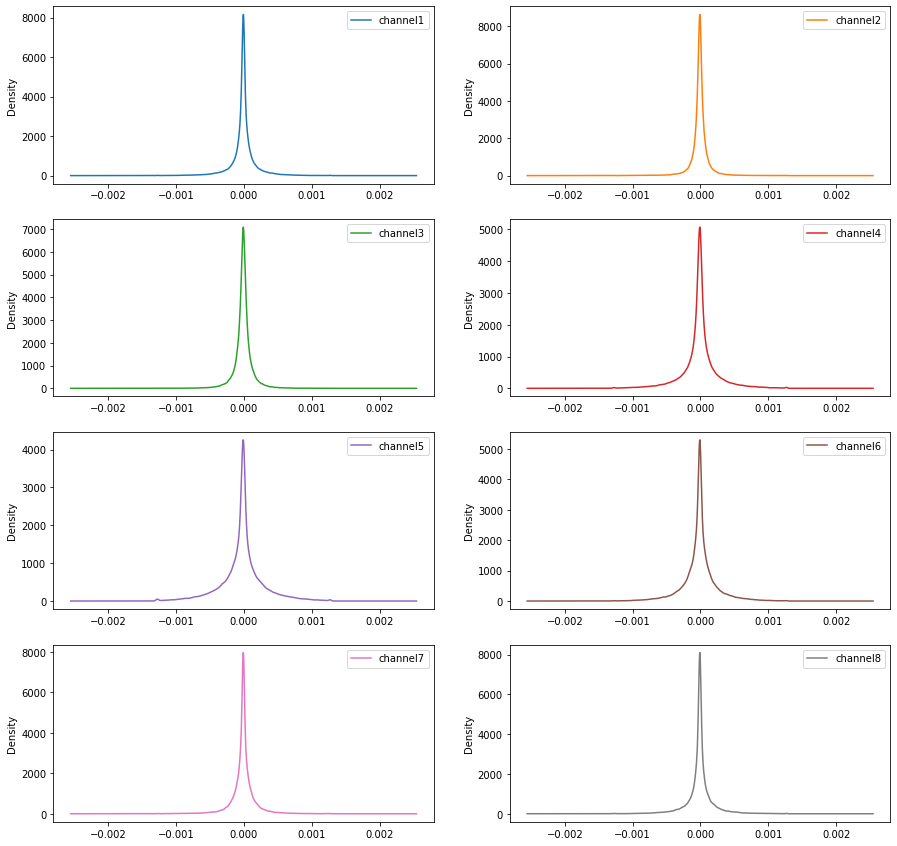

In [ ]:
# density plots to check the distribution of each feature in the dataset

dataset[features].plot(kind="density", layout=(4,2), subplots=True, sharex=False, sharey=False, figsize=(15,15))
plt.show()

The density plots signifies that all the features are normally distributed

#### **Heat map**
To understand the correlation between the features

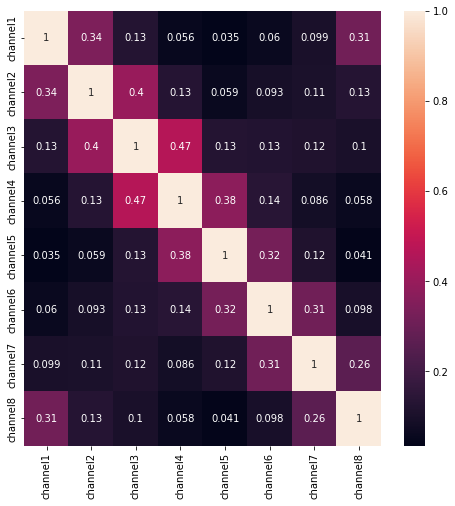

In [ ]:
# finding the correlation between all pairs of features
corr = dataset[features].corr()

# plotting using heatmap
plt.figure(figsize=(8, 8))
hmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

It is observed that there is no significant correlation between the features indicating that the features are independent of each other

## **Training and Selecting a model**

In [ ]:
# seperating the features and the target 
X = dataset[features]
y = dataset['class']

# splitting the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [ ]:
# trying different models to train the data 
models = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB()]
model_names = ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'K Neighbors Classifier', 'Gaussain NB']

# getting the accuracy of all the models
for i in range(len(models)):

  # train the model using the training data and getting the predictions
  models[i].fit(X_train, y_train)
  predictions = models[i].predict(X_test) 

  # printing the accuracy 
  print(model_names[i], ' => ', accuracy_score(y_test, predictions))

Logistic Regression  =>  0.17569327383903488
Random Forest Classifier  =>  0.9867360766815403
Decision Tree Classifier  =>  0.9817154189390184
K Neighbors Classifier  =>  0.973501900512312
Gaussain NB  =>  0.5676119649644686


As seen, Random Forest Classifier provides the best accuracy score. Therefore Random Forest Classifier is chosen as the model

In [ ]:
# choosing Random Forest Classifier as the model
model = models[1]
model_name = model_names[1]

## **Evaluating the model**

### **Accuracy**

In [ ]:
# finding the accuracy of the model

train_pred = model.predict(X_train) # predict training data
test_pred = model.predict(X_test)   # predict test data

# printing the accuracy scores
print('Training Accuracy => ', accuracy_score(y_train, train_pred))
print('Testing  Accuracy => ', accuracy_score(y_test, test_pred))

Training Accuracy =>  0.9999909105932904
Testing  Accuracy =>  0.9867360766815403


The training and testing data gives a good accuracy of 99% and 98.6% respectively. Hence we can conclude that the model has performed well. 

### **Confusion matrix**

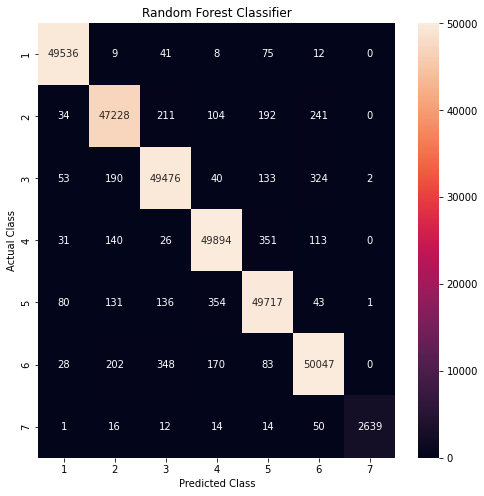

In [ ]:
# getting the confusion matrix
cf_matrix = confusion_matrix(y_test, test_pred)

# visualizing the confusion matrix
plt.figure(figsize=[8, 8])
plt.title(model_name)
sns.heatmap(cf_matrix, annot=True, fmt='g', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

It can be observed from the confusion matrix that the model predicted the classes well. It is also seen that inspite of records having class '7' as label are less, the model has performed well on the test data in predicting class '7'